## External Compton Tutorial
In this tutorial we will show how to compute the Spectral Energy Distribution produced by Compton scattering by the blob electorns of three different photon targets: a Shakura Sunyaev accretion disk, a Broad Line region represented as a spherical shell and a Dust Torus represented as a simple ring.

In [1]:
# import numpy, astropy and matplotlib for basic functionalities
import numpy as np
import astropy.units as u
import astropy.constants as const
from astropy.coordinates import Distance
import matplotlib.pyplot as plt

In [2]:
# import agnpy classes
from agnpy.emission_regions import Blob
from agnpy.compton import ExternalCompton
from agnpy.targets import SSDisk, SphericalShellBLR, RingDustTorus

In [3]:
# matplotlib adjustments and axes labels
plt.rc("figure", figsize=(7.5, 5.5))
plt.rc("font", size=12)
plt.rc("axes", grid=True)
plt.rc("grid", ls=":")
sed_x_label = r"$\nu\,/\,Hz$"
sed_y_label = r"$\nu F_{\nu}\,/\,(\mathrm{erg}\,\mathrm{cm}^{-2}\,\mathrm{s}^{-1})$"

### emission region
In order to provide a cross-check with the literature, in this tutorial we will reproduce the results in Finke (2016) - [see bibliography in the docs](https://agnpy.readthedocs.io/en/latest/bibliography.html). Therefore we adapt an emission region with the same parameters specified in the paper. In this case we consider a broken power-law to describe the electron distribution.

In [4]:
spectrum_norm = 6e42 * u.erg
parameters = {
    "p1": 2.0001,
    "p2": 3.5,
    "gamma_b": 1e4,
    "gamma_min": 20,
    "gamma_max": 5e7,
}
spectrum_dict = {"type": "BrokenPowerLaw", "parameters": parameters}
R_b = 1e16 * u.cm
B = 0.56 * u.G
z = 1
delta_D = 40
Gamma = 40
blob = Blob(R_b, z, delta_D, Gamma, B, spectrum_norm, spectrum_dict)
blob.set_gamma_size(500)
print(f"total number {blob.N_e_tot:.2e}")
print(f"total energy {blob.W_e:.2e}")

normalising broken power-law to total energy density u_e: 1.43e-06 erg / cm3
total number 5.32e+46
total energy 6.00e+42 erg


In [5]:
print(blob)

* spherical emission region
 - R_b (radius of the blob): 1.00e+16 cm
 - V_b (volume of the blob): 4.19e+48 cm3
 - z (source redshift): 1.00
 - d_L (source luminosity distance):2.10e+28 cm
 - delta_D (blob Doppler factor): 4.00e+01
 - Gamma (blob Lorentz factor): 4.00e+01
 - Beta (blob relativistic velocity): 1.00e+00
 - mu_s (cosine of the jet viewing angle): 1.00e+00
 - B (magnetic field tangled to the jet): 5.60e-01 G
* electron spectrum
 - broken power law
 - k_e: 2.54e-09 1 / cm3
 - p1: 2.00
 - p2: 3.50
 - gamma_b: 1.00e+04
 - gamma_min: 2.00e+01
 - gamma_max: 5.00e+07



### External Compton on Shakura Sunyaev Disk
The first result we reproduce is the SED generated by the External Compton (EC) scattering over a Shakura Sunyaev accretion disk, represented by the black lines in Figure 8. Different curves represent different distances between the emission region and the target. 

<img src="figures/figure_8_finke_2016.png" style="float: left;" width="500"/>

Let us start define an accretion disk around a Schwarzschild black hole of mass $1.2 \times 10^9 \, M_{\odot}$ (for an accretion disk around a Schwarzschild BH $\eta=1/12$, $R_{\rm in} = 6 R_g$, where $R_g$ is the gravitational radius).

In [6]:
# let us adopt the same disk parameters of Finke 2016
M_sun = const.M_sun.cgs
M_BH = 1.2 * 1e9 * M_sun
R_g = ((const.G * M_BH) / (const.c * const.c)).cgs
L_disk = 2 * 1e46 * u.Unit("erg s-1")
eta = 1 / 12
R_in = 6 * R_g
R_out = 200 * R_g
disk = SSDisk(M_BH, L_disk, eta, R_in, R_out)

In [7]:
print(disk)

* Shakura Sunyaev accretion disk:
 - M_BH (central black hole mass): 2.39e+42 g
 - L_disk (disk luminosity): 2.00e+46 erg / s
 - eta (accretion efficiency): 8.33e-02
 - dot(m) (mass accretion rate): 2.67e+26 g / s
 - R_in (disk inner radius): 1.06e+15 cm
 - R_out (disk inner radius): 3.54e+16 cm


### external Compton radiation
Similarly to the synchrotron self-Compton case, to intitialise the object that will compute the  external Compton (EC) radiation, we simply pass the `Blob` and the `Target` objects to the `ExternalCompton` class. **Note** in this case also the distance `r` between the target and the emission region (in `astropy.units`) has to be specified, as this will modify the SED.

In [8]:
ec_disk_1 = ExternalCompton(blob, disk, r=1e17 * u.cm)
ec_disk_2 = ExternalCompton(blob, disk, r=1e18 * u.cm)
ec_disk_3 = ExternalCompton(blob, disk, r=1e19 * u.cm)

In [9]:
# define the array of frequencies over which to calculate the SED 
nu = np.logspace(15, 30) * u.Hz
# compute it
ec_disk_sed_1 = ec_disk_1.sed_flux(nu)
ec_disk_sed_2 = ec_disk_2.sed_flux(nu)
ec_disk_sed_3 = ec_disk_3.sed_flux(nu)

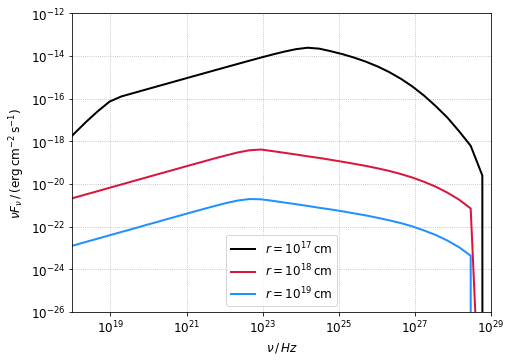

In [10]:
plt.loglog(nu, ec_disk_sed_1, lw=2, color="k", label=r"$r=10^{17}\,{\rm cm}$")
plt.loglog(nu, ec_disk_sed_2, lw=2, color="crimson", label=r"$r=10^{18}\,{\rm cm}$")
plt.loglog(nu, ec_disk_sed_3, lw=2, color="dodgerblue", label=r"$r=10^{19}\,{\rm cm}$")
plt.xlim([1e18, 1e29])
plt.ylim([1e-26, 1e-12])
plt.xlabel(sed_x_label)
plt.ylabel(sed_y_label)
plt.legend()
plt.show()

### External Compton Spherical Shell Broad Line Region
The second result we reproduce is the SED generated by the EC scattering over a Broad Line Region (BLR) modelled as an infinitesimally thin spherical shell, of radius $R_{\rm line}$, emitting only a sinlge spectral line, of dimensionless energy $\epsilon_{\rm line} = h \nu_{\rm line} / (m_e c^2)$. A fraction of the disk luminosity $\xi_{\rm line}$ is being reprocessed. The SEDs we aim to reproduce are represented by the black lines in Figure 10, with different curves representing different distances between the emission region and the target. 

<img src="figures/figure_10_finke_2016.png" style="float: left;" width="500"/>

A **note** on the targets representing the reprocessed radiation of the disk (i.e. BLR and Torus): in their initialisation also the disk instance has to be passed (they are physically reprocessing its radiation). As in Finke 2016, let us consider a Spherical Shell Broad Line Region emitting the Lyman alpha line and reprocessing the radiation of the disk defined above.

In [ ]:
epsilon_line = 2e-5
xi_line = 0.024
R_line = 1e17 * u.cm
# the BLR definition needs the accretion disk object as first argument
blr = SphericalShellBLR(disk, xi_line, epsilon_line, R_line)

In [ ]:
ec_blr_1 = ExternalCompton(blob, blr, r=1e16 * u.cm)
ec_blr_2 = ExternalCompton(blob, blr, r=1e18 * u.cm)
ec_blr_3 = ExternalCompton(blob, blr, r=1e19 * u.cm)

In [ ]:
# compute the SEDs
ec_blr_sed_1 = ec_blr_1.sed_flux(nu)
ec_blr_sed_2 = ec_blr_2.sed_flux(nu)
ec_blr_sed_3 = ec_blr_3.sed_flux(nu)

In [ ]:
plt.loglog(nu, ec_blr_sed_1, lw=2, color="k", label=r"$r=10^{17}\,{\rm cm}$")
plt.loglog(nu, ec_blr_sed_2, lw=2, color="crimson", label=r"$r=10^{18}\,{\rm cm}$")
plt.loglog(nu, ec_blr_sed_3, lw=2, color="dodgerblue", label=r"$r=10^{19}\,{\rm cm}$")
plt.ylim(1e-25, 1e-12)
plt.xlim(1e15, 1e29)
plt.xlabel(sed_x_label)
plt.ylabel(sed_y_label)
plt.legend()
plt.show()

### External Compton Spherical Ring Dust Torus
The second result we reproduce is the SED generated by the EC scattering over a Dust Torus modelled as an infinitesimally thin ring of radius $R_{\rm dt}$. We approximate the target photons energy with the peak energy of the Dust Torus black body ($\epsilon_{\rm dt} = 2.7 k_B T / (m_e c^2)$). The Torus is reprocessing a fraction $\xi_{\rm dt}$ of the disk luminosity. The SEDs we aim to reproduce are represented by the black lines in Figure 11, with different curves representing different distances between the emission region and the target. 

<img src="figures/figure_11_finke_2016.png" style="float: left;" width="500"/>

In [ ]:
T_dt = 1e3 * u.K
epsilon_dt = 2.7 * ((const.k_B * T_dt) / (const.m_e * const.c * const.c)).decompose()
csi_dt = 0.1
# as for the BLR, the dust torus definition needs the accretion disk object as first argument
dt = RingDustTorus(disk, csi_dt, epsilon_dt)

In [ ]:
ec_dt_1 = ExternalCompton(blob, dt, r=1e19 * u.cm)
ec_dt_2 = ExternalCompton(blob, dt, r=1e20 * u.cm)
ec_dt_3 = ExternalCompton(blob, dt, r=1e21 * u.cm)

In [ ]:
# compute the SEDs
ec_dt_sed_1 = ec_dt_1.sed_flux(nu)
ec_dt_sed_2 = ec_dt_2.sed_flux(nu)
ec_dt_sed_3 = ec_dt_3.sed_flux(nu)

In [ ]:
plt.loglog(nu, ec_dt_sed_1, lw=2, color="k", label=r"$r=10^{19}\,{\rm cm}$")
plt.loglog(nu, ec_dt_sed_2, lw=2, color="crimson", label=r"$r=10^{20}\,{\rm cm}$")
plt.loglog(nu, ec_dt_sed_3, lw=2, color="dodgerblue", label=r"$r=10^{21}\,{\rm cm}$")
plt.ylim(1e-28, 1e-14)
plt.xlim(1e16, 1e29)
plt.xlabel(sed_x_label)
plt.ylabel(sed_y_label)
plt.legend()
plt.show()